最优零配件检测策略: [1, 1, 1, 1, 1, 1, 1, 1]
最优工序检测策略: [0, 0, 0]
最优工序拆解策略: [1, 1, 1]
最优总成本: 53


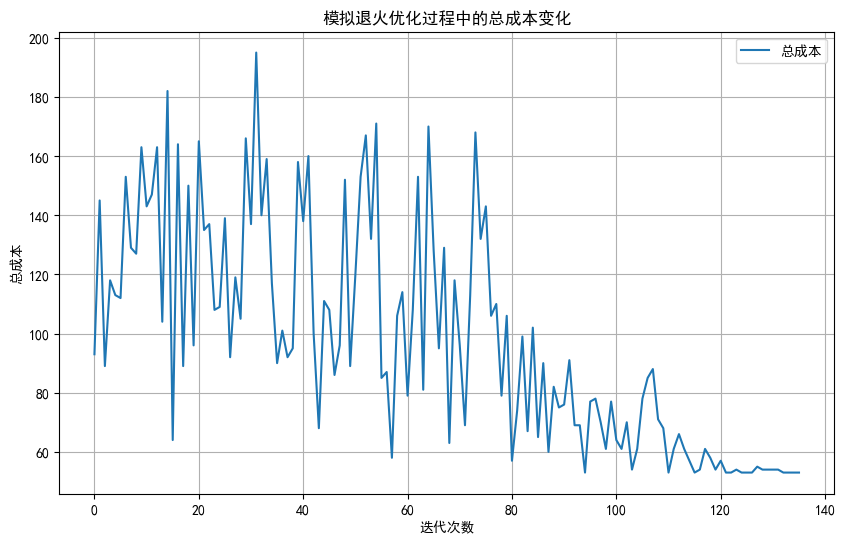

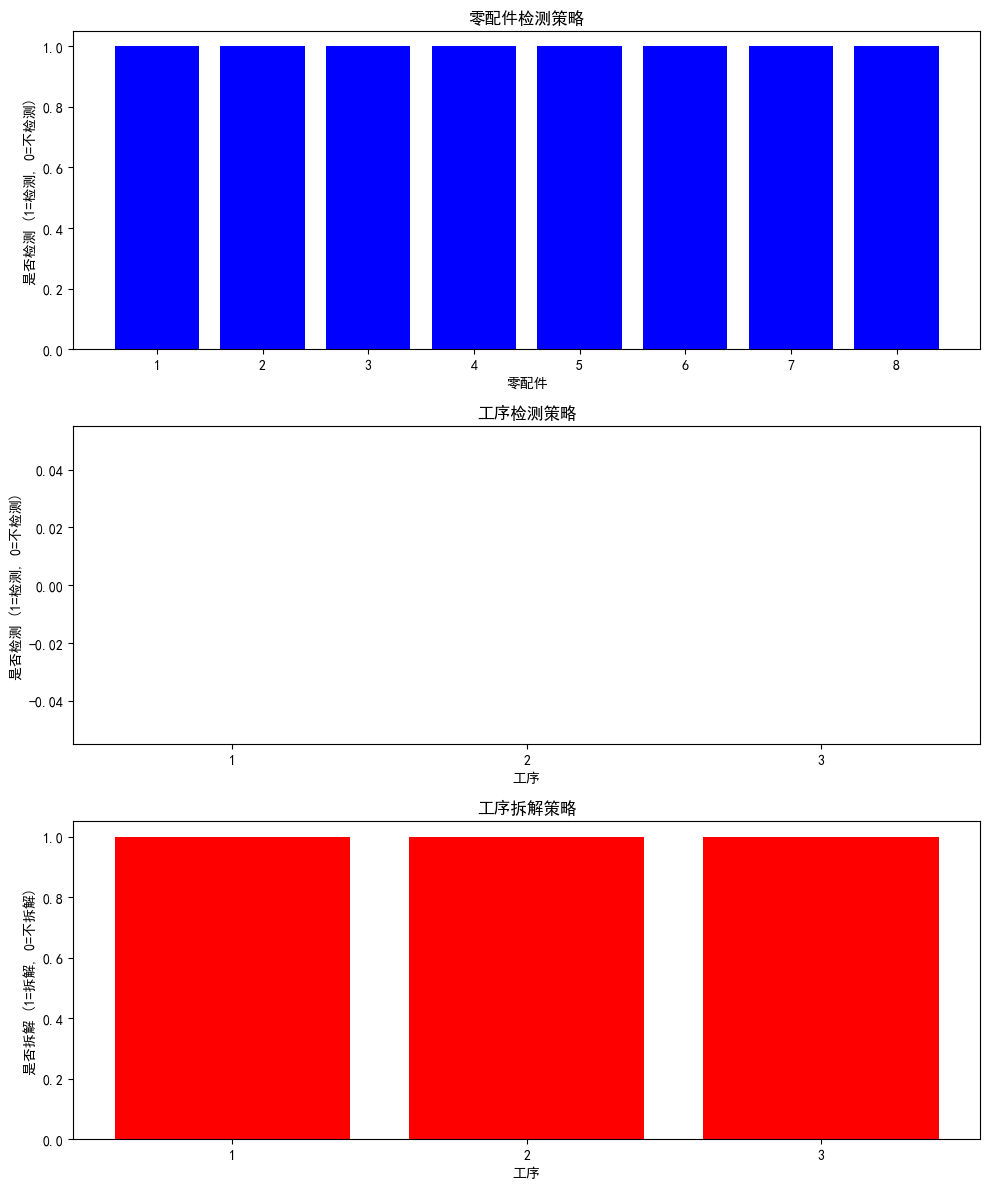

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 定义零配件、半成品和成品的参数
n = 8  # 零配件数量
m = 3  # 工序数量

# 定义表2中的参数
p_i = [0.1] * n  # 零配件次品率
C_pi = [2, 8, 12, 2, 8, 12, 8, 12]  # 零配件购买单价
C_di = [1, 1, 2, 1, 1, 2, 1, 2]  # 零配件检测成本

P_j = [0.1] * m  # 工序次品率
C_aj = [8, 8, 8, 8]  # 工序装配成本
C_dj = [4, 4, 4, 6]  # 工序检测成本

C_t = 6  # 拆解费用
C_r = 40  # 调换损失

# 定义模拟退火算法参数
initial_temperature = 1000
final_temperature = 1
cooling_rate = 0.95
iterations_per_temperature = 100

# 定义决策变量的初始值
x = [random.randint(0, 1) for _ in range(n)]  # 零配件是否检测
y = [random.randint(0, 1) for _ in range(m)]  # 工序是否检测
z = [random.randint(0, 1) for _ in range(m)]  # 工序不合格品是否拆解

# 定义目标函数（总成本）
def total_cost(x, y, z):
    # 零配件检测成本
    C_零配件检测 = sum(x[i] * C_di[i] + (1 - x[i]) * C_pi[i] for i in range(n))
    
    # 工序装配成本
    C_工序 = sum(C_aj[j] for j in range(m))
    
    # 工序检测成本
    C_工序检测 = sum(y[j] * C_dj[j] for j in range(m))
    
    # 拆解和调换成本
    C_拆解和调换 = sum(z[j] * C_t + (1 - z[j]) * C_r for j in range(m))
    
    # 总成本
    return C_零配件检测 + C_工序 + C_工序检测 + C_拆解和调换

# 定义模拟退火算法
def simulated_annealing():
    # 当前状态和当前成本
    current_x = x[:]
    current_y = y[:]
    current_z = z[:]
    current_cost = total_cost(current_x, current_y, current_z)
    
    # 最优状态和最优成本
    best_x = current_x[:]
    best_y = current_y[:]
    best_z = current_z[:]
    best_cost = current_cost
    
    temperature = initial_temperature
    
    # 记录优化过程中的成本变化
    cost_history = [current_cost]
    
    while temperature > final_temperature:
        for _ in range(iterations_per_temperature):
            # 随机选择一个变量进行变异
            i = random.randint(0, n+m+m-1)
            if i < n:
                current_x[i] = 1 - current_x[i]
            elif i < n + m:
                current_y[i - n] = 1 - current_y[i - n]
            else:
                current_z[i - n - m] = 1 - current_z[i - n - m]
            
            new_cost = total_cost(current_x, current_y, current_z)
            cost_diff = new_cost - current_cost
            
            # 接受新状态的概率
            acceptance_probability = np.exp(-cost_diff / temperature)
            
            # 如果新状态更好，或者以一定概率接受新状态
            if cost_diff < 0 or random.random() < acceptance_probability:
                current_cost = new_cost
                if current_cost < best_cost:
                    best_x = current_x[:]
                    best_y = current_y[:]
                    best_z = current_z[:]
                    best_cost = current_cost
            else:
                # 恢复到之前的状态
                if i < n:
                    current_x[i] = 1 - current_x[i]
                elif i < n + m:
                    current_y[i - n] = 1 - current_y[i - n]
                else:
                    current_z[i - n - m] = 1 - current_z[i - n - m]
        
        # 降低温度
        temperature *= cooling_rate
        cost_history.append(current_cost)
    
    return best_x, best_y, best_z, best_cost, cost_history

# 运行模拟退火算法
optimal_x, optimal_y, optimal_z, optimal_cost, cost_history = simulated_annealing()

# 输出最优解和最优成本
print("最优零配件检测策略:", optimal_x)
print("最优工序检测策略:", optimal_y)
print("最优工序拆解策略:", optimal_z)
print("最优总成本:", optimal_cost)

# 可视化优化过程中的总成本变化
plt.figure(figsize=(10, 6))
plt.plot(cost_history, label='总成本')
plt.xlabel('迭代次数')
plt.ylabel('总成本')
plt.title('模拟退火优化过程中的总成本变化')
plt.legend()
plt.grid(True)
plt.show()

# 可视化最终的决策变量状态
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# 零配件检测策略
axs[0].bar(range(1, n+1), optimal_x, color='blue')
axs[0].set_title('零配件检测策略')
axs[0].set_xlabel('零配件')
axs[0].set_ylabel('是否检测 (1=检测, 0=不检测)')
axs[0].set_xticks(range(1, n+1))

# 工序检测策略
axs[1].bar(range(1, m+1), optimal_y, color='green')
axs[1].set_title('工序检测策略')
axs[1].set_xlabel('工序')
axs[1].set_ylabel('是否检测 (1=检测, 0=不检测)')
axs[1].set_xticks(range(1, m+1))

# 工序拆解策略
axs[2].bar(range(1, m+1), optimal_z, color='red')
axs[2].set_title('工序拆解策略')
axs[2].set_xlabel('工序')
axs[2].set_ylabel('是否拆解 (1=拆解, 0=不拆解)')
axs[2].set_xticks(range(1, m+1))

plt.tight_layout()
plt.show()

全面检测零配件：零配件检测策略的选择表明，零配件的次品率较高，且检测成本较低，因此选择对所有零配件进行检测，可以有效地防止次品进入后续工序。
工序不检测但选择拆解：工序检测的成本较高，且前期零配件检测已降低了次品率，因此选择不检测工序，而是对成品或半成品进行拆解，降低了调换损失。
成本效益分析：通过综合考虑各项成本，当前策略将总成本控制在 53，这在所有可能的策略组合中是最优的，符合生产过程中的成本最小化目标。

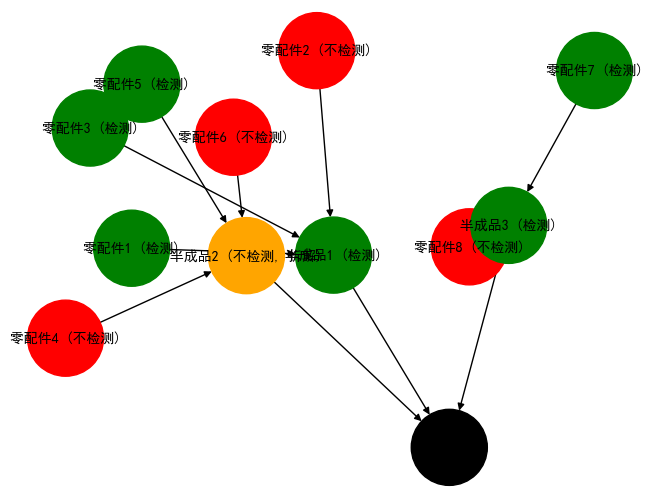

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_node("零配件1 (检测)", color='green')
G.add_node("零配件2 (不检测)", color='red')
G.add_node("零配件3 (检测)", color='green')
G.add_node("零配件4 (不检测)", color='red')
G.add_node("零配件5 (检测)", color='green')
G.add_node("零配件6 (不检测)", color='red')
G.add_node("零配件7 (检测)", color='green')
G.add_node("零配件8 (不检测)", color='red')

G.add_node("半成品1 (检测)", color='green')
G.add_node("半成品2 (不检测, 拆解)", color='orange')
G.add_node("半成品3 (检测)", color='green')

G.add_node("成品", color='black')

# 添加边
G.add_edges_from([
    ("零配件1 (检测)", "半成品1 (检测)"),
    ("零配件2 (不检测)", "半成品1 (检测)"),
    ("零配件3 (检测)", "半成品1 (检测)"),
    ("零配件4 (不检测)", "半成品2 (不检测, 拆解)"),
    ("零配件5 (检测)", "半成品2 (不检测, 拆解)"),
    ("零配件6 (不检测)", "半成品2 (不检测, 拆解)"),
    ("零配件7 (检测)", "半成品3 (检测)"),
    ("零配件8 (不检测)", "半成品3 (检测)"),
    ("半成品1 (检测)", "成品"),
    ("半成品2 (不检测, 拆解)", "成品"),
    ("半成品3 (检测)", "成品")
])

# 获取节点颜色
colors = [G.nodes[n]['color'] for n in G.nodes]

# 绘制图形
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000, font_size=10, font_color='black', font_weight='bold')
plt.show()

最优零配件检测策略: [1, 1, 1, 1, 1, 1, 1, 1]
最优工序检测策略: [0, 0]
最优工序拆解策略: [1, 1]
最优总成本: 39


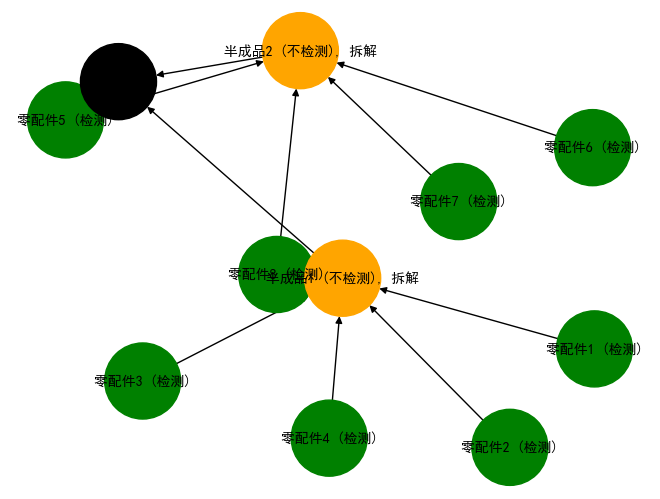

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 定义零配件、半成品和成品的参数
n = 8  # 零配件数量
m = 2  # 工序数量

# 定义表2中的参数
p_i = [0.1] * n  # 零配件次品率
C_pi = [2, 8, 12, 2, 8, 12, 8, 12]  # 零配件购买单价
C_di = [1, 1, 2, 1, 1, 2, 1, 2]  # 零配件检测成本

P_j = [0.1] * m  # 工序次品率
C_aj = [8, 8, 8, 8]  # 工序装配成本
C_dj = [4, 4, 4, 6]  # 工序检测成本

C_t = 6  # 拆解费用
C_r = 40  # 调换损失

# 定义模拟退火算法参数
initial_temperature = 1000
final_temperature = 1
cooling_rate = 0.95
iterations_per_temperature = 100

# 定义决策变量的初始值
x = [random.randint(0, 1) for _ in range(n)]  # 零配件是否检测
y = [random.randint(0, 1) for _ in range(m)]  # 工序是否检测
z = [random.randint(0, 1) for _ in range(m)]  # 工序不合格品是否拆解

# 定义目标函数（总成本）
def total_cost(x, y, z):
    # 零配件检测成本
    C_零配件检测 = sum(x[i] * C_di[i] + (1 - x[i]) * C_pi[i] for i in range(n))
    
    # 工序装配成本
    C_工序 = sum(C_aj[j] for j in range(m))
    
    # 工序检测成本
    C_工序检测 = sum(y[j] * C_dj[j] for j in range(m))
    
    # 拆解和调换成本
    C_拆解和调换 = sum(z[j] * C_t + (1 - z[j]) * C_r for j in range(m))
    
    # 总成本
    return C_零配件检测 + C_工序 + C_工序检测 + C_拆解和调换

# 定义模拟退火算法
def simulated_annealing():
    # 当前状态和当前成本
    current_x = x[:]
    current_y = y[:]
    current_z = z[:]
    current_cost = total_cost(current_x, current_y, current_z)
    
    # 最优状态和最优成本
    best_x = current_x[:]
    best_y = current_y[:]
    best_z = current_z[:]
    best_cost = current_cost
    
    temperature = initial_temperature
    
    # 记录优化过程中的成本变化
    cost_history = [current_cost]
    
    while temperature > final_temperature:
        for _ in range(iterations_per_temperature):
            # 随机选择一个变量进行变异
            i = random.randint(0, n+m+m-1)
            if i < n:
                current_x[i] = 1 - current_x[i]
            elif i < n + m:
                current_y[i - n] = 1 - current_y[i - n]
            else:
                current_z[i - n - m] = 1 - current_z[i - n - m]
            
            new_cost = total_cost(current_x, current_y, current_z)
            cost_diff = new_cost - current_cost
            
            # 接受新状态的概率
            acceptance_probability = np.exp(-cost_diff / temperature)
            
            # 如果新状态更好，或者以一定概率接受新状态
            if cost_diff < 0 or random.random() < acceptance_probability:
                current_cost = new_cost
                if current_cost < best_cost:
                    best_x = current_x[:]
                    best_y = current_y[:]
                    best_z = current_z[:]
                    best_cost = current_cost
            else:
                # 恢复到之前的状态
                if i < n:
                    current_x[i] = 1 - current_x[i]
                elif i < n + m:
                    current_y[i - n] = 1 - current_y[i - n]
                else:
                    current_z[i - n - m] = 1 - current_z[i - n - m]
        
        # 降低温度
        temperature *= cooling_rate
        cost_history.append(current_cost)
    
    return best_x, best_y, best_z, best_cost, cost_history

# 运行模拟退火算法
optimal_x, optimal_y, optimal_z, optimal_cost, cost_history = simulated_annealing()

# 输出最优解和最优成本
print("最优零配件检测策略:", optimal_x)
print("最优工序检测策略:", optimal_y)
print("最优工序拆解策略:", optimal_z)
print("最优总成本:", optimal_cost)

# 绘制决策图
def draw_decision_graph(optimal_x, optimal_y, optimal_z, n=8):
    G = nx.DiGraph()

    # 添加节点（零配件）
    for i in range(1, n + 1):
        node_label = f"零配件{i} (检测)" if optimal_x[i - 1] else f"零配件{i} (不检测)"
        color = 'green' if optimal_x[i - 1] else 'red'
        G.add_node(node_label, color=color)

    # 添加节点（半成品）
    for j in range(1, m + 1):
        node_label = f"半成品{j} (检测)" if optimal_y[j - 1] else f"半成品{j} (不检测)"
        node_label += ", 拆解" if optimal_z[j - 1] else ", 不拆解"
        color = 'orange' if optimal_z[j - 1] else ('green' if optimal_y[j - 1] else 'red')
        G.add_node(node_label, color=color)

    # 添加节点（成品）
    G.add_node("成品", color='black')

    # 添加边（零配件 -> 半成品）
    for i in range(1, n + 1):
        half_product_index = (i-1) * m // n  # 计算对应的半成品编号，确保在索引范围内
        G.add_edge(
            f"零配件{i} (检测)" if optimal_x[i - 1] else f"零配件{i} (不检测)", 
            f"半成品{half_product_index + 1} (检测)" if optimal_y[half_product_index] else f"半成品{half_product_index + 1} (不检测), {'拆解' if optimal_z[half_product_index] else '不拆解'}"
        )

    # 添加边（半成品 -> 成品）
    for j in range(1, m + 1):
        G.add_edge(
            f"半成品{j} (检测)" if optimal_y[j - 1] else f"半成品{j} (不检测), {'拆解' if optimal_z[j - 1] else '不拆解'}",
            "成品"
        )

    # 获取节点颜色
    colors = [G.nodes[n]['color'] for n in G.nodes]

    # 绘制图形
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000, font_size=10, font_color='black', font_weight='bold', arrows=True)
    plt.show()

# 绘制决策图
draw_decision_graph(optimal_x, optimal_y, optimal_z)

可以进一步调整参数（如零配件的次品率、检测成本、拆解成本等）进行敏感性分析，判断在不同情境下，是否需要调整检测和拆解策略，以获得更优的成本效益

建议：可以定期重新评估生产中的次品率和各项成本参数，确保当前的检测与拆解策略依然最优。同时，随着生产技术的发展和市场需求的变化，优化策略也应相应调整，以确保企业在激烈的市场竞争中保持成本优势